In [1]:
import os
import numpy as np
import pandas as pd
import scipy.stats as st
import numpy.random as rd
import matplotlib.pyplot as plt
from IPython.display import display
plt.style.use("ggplot")

%matplotlib inline

In [2]:
import os
os.chdir("../..")
home_dir = os.getcwd()
os.chdir("src")

from baumwelch import BaumWelch
from sdhm import SDHM
os.chdir(home_dir)

# Access Tracer

1. 隠れマルコフモデルの混合分布による行動モデリング
2. 複数の混合隠れマルコフモデルのオンライン忘却型学習
3. 動的モデル選択による最適混合数の決定
4. スコアリング

## データ生成

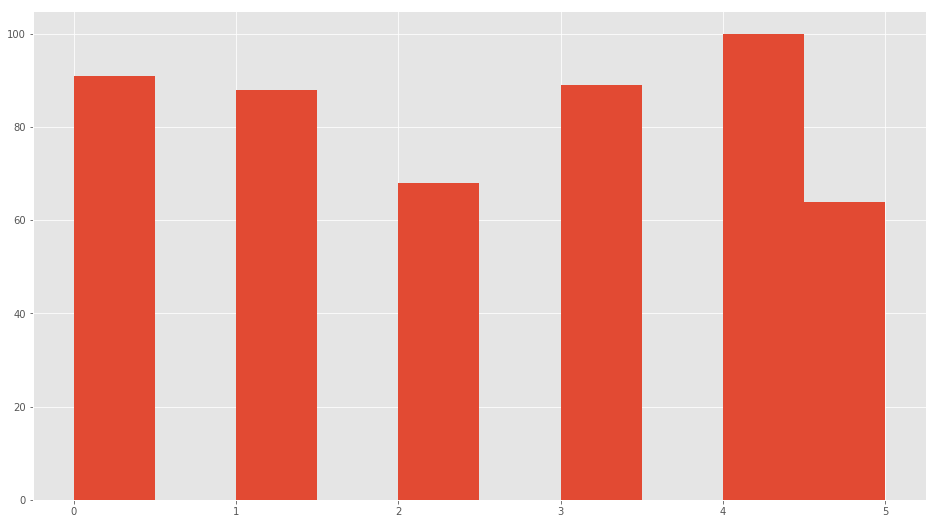

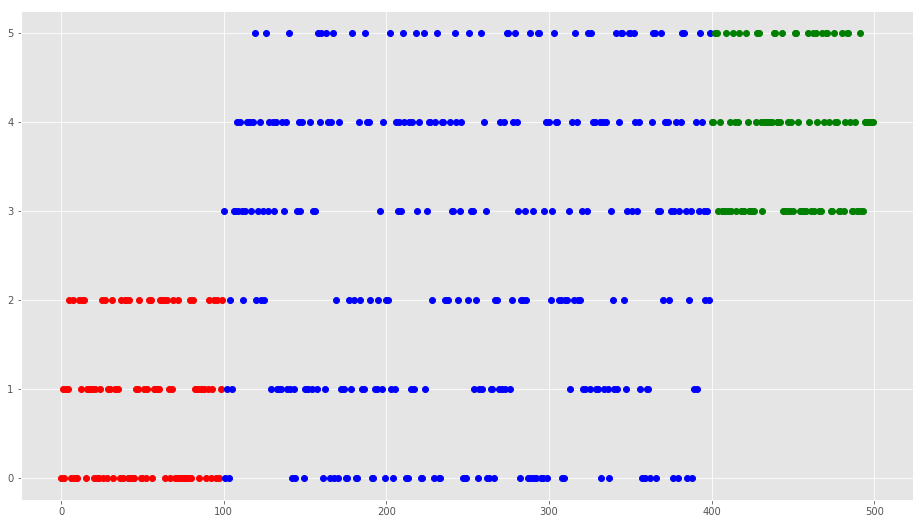

In [3]:
rd.seed(0)

dice1 = [1, 2, 3, 4, 5 ,0]
dice2 = [0, 1, 2]
dice3 = [3, 4, 5]

y1 = rd.choice(dice2, 100)
flag1 = np.array([2 for i in range(100)])
y2 = rd.choice(dice1, 300)
flag2 = np.array([1 for i in range(300)])
y3 = rd.choice(dice3, 100)
flag3 = np.array([3 for i in range(100)])

y = np.concatenate([y1, y2, y3])
flag = np.concatenate([flag1, flag2, flag3])
data = np.concatenate([y[:, np.newaxis], flag[:, np.newaxis]], axis=1)
org_data = pd.DataFrame(data)

plt.figure(figsize=(16, 9))
plt.hist(org_data[0])
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(org_data.loc[org_data[1]==2][0], "o", c="r")
plt.plot(org_data.loc[org_data[1]==1][0], "o", c="b")
plt.plot(org_data.loc[org_data[1]==3][0], "o", c="g")
plt.show()

In [4]:
window_size = 5
y = np.array([np.array(org_data[0][i:i+window_size]) for i in range(org_data.shape[0]-window_size+1)])

In [5]:
Y = [0, 1]
y = np.array([np.random.choice(Y, 3) for i in range(500)])
#y = np.array([0, 1, 0])[:, np.newaxis]
y

array([[0, 0, 0],
       [0, 1, 1],
       [1, 1, 0],
       ..., 
       [0, 0, 0],
       [1, 0, 1],
       [0, 0, 1]])

## SDHM

## 入力パラメータ設定

In [6]:
# Given
r = 0.1 # 忘却パラメータ 0<r<1
nu = 0.9 # 推定係数
K = 1 # 混合数
n = 1 # HMMの次数
M = y.shape[0] # データ数
Tj = y.shape[1] # セッションの長さ
N1 = 3 # 状態変数の数
N2 = 2 # 出力シンボルの数

In [7]:
sdhm = SDHM(r, nu, K, Tj, N1, N2)

In [8]:
sdhm.a = np.array([[[[1, 7, 2],
              [2, 1, 7],
              [7, 2, 1]]]]) / 10

sdhm.b = np.array([[[[9, 1],
              [6, 4],
              [1, 9]]]]) / 10

sdhm.a_ = sdhm.a.copy()
sdhm.b_ = sdhm.b.copy()

#sdhm.gamma = np.array([[[0.2, 0.3, 0.5]]])
#sdhm.gamma_ = sdhm.gamma.copy()

In [9]:
while True:
    if sdhm.j == M-1:
        break
    sdhm.update(y[sdhm.j])

sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0


sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0


sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0
sum 1.0


In [10]:
sdhm.a

array([[[[ 0.1       ,  0.7       ,  0.2       ],
         [ 0.2       ,  0.1       ,  0.7       ],
         [ 0.7       ,  0.2       ,  0.1       ]]],


       [[[ 0.10971224,  0.7036452 ,  0.18664256],
         [ 0.22713446,  0.1037129 ,  0.66915264],
         [ 0.70646165,  0.19686736,  0.09667099]]],


       [[[ 0.10426249,  0.70879369,  0.18694382],
         [ 0.20950683,  0.10334449,  0.68714869],
         [ 0.68347942,  0.20576293,  0.11075765]]],


       ..., 
       [[[ 0.20526852,  0.74373668,  0.0509948 ],
         [ 0.37365259,  0.09958673,  0.52676068],
         [ 0.25443428,  0.34659413,  0.39897159]]],


       [[[ 0.21747919,  0.73166843,  0.05085238],
         [ 0.38307021,  0.0974318 ,  0.51949799],
         [ 0.26276342,  0.34121538,  0.3960212 ]]],


       [[[ 0.20853936,  0.74047328,  0.05098736],
         [ 0.38813983,  0.09588395,  0.51597622],
         [ 0.26224251,  0.34101736,  0.39674013]]]])

In [11]:
def generate_init_matrix(R, C):
    '''
    R: 行数
    C: 列数
    適当な初期値をもつR✕C行列を生成する関数
    '''
    #空の行列を作成
    M = np.zeros((R, C))
    #適当な値を行ごとに代入していく(各行の合計が1になれば良い)
    for i in range(R):
        rand = np.random.rand(C) #0~1の一様乱数生成
        rand = rand / np.sum(rand) #合計が1になるようにする
        M[i] = rand
    
    return M

In [12]:
A = generate_init_matrix(N1, N1)
print(A)

[[ 0.4566685   0.29948118  0.24385032]
 [ 0.30297363  0.58970191  0.10732446]
 [ 0.39545839  0.35203661  0.252505  ]]


In [13]:
B = generate_init_matrix(N1, N2)
print(B)

[[ 0.05768808  0.94231192]
 [ 0.63516855  0.36483145]
 [ 0.74651887  0.25348113]]


In [14]:
G = generate_init_matrix(1, N1)
print(G)

[[ 0.43380765  0.50858219  0.05761016]]


https://qiita.com/ta-ka/items/3e5306d0432c05909992

結果の部分参照

行列Aは横方向で見れば、足すと１で確率値となっているが、
縦方向で見ると、足しても１になっていない

### τについて

In [38]:
sdhm.tau[0, k, 0, :, :]

array([[ 0.10247168,  0.27970259,  0.03265345],
       [ 0.20494337,  0.03995751,  0.11428708],
       [ 0.1992505 ,  0.02219862,  0.0045352 ]])

In [39]:
sdhm.tau[0, k, 0, i, :]

array([ 0.10247168,  0.27970259,  0.03265345])

In [42]:
a = 0
c = []
for i in range(1):
    b = np.sum(sdhm.tau[0, k, 0, i, :])
    for j in range(3):
        a += np.sum(sdhm.tau[0, k, 0, i, j])
        c.append(np.sum(sdhm.tau[0, k, 0, i, :]))
print(a)
print(b)
print(c)

0.414827722016
0.414827722016
[0.41482772201601642, 0.41482772201601642, 0.41482772201601642]


## 計算結果としては同じだが, 現在のコードでは, cのような計算を行っていることになる